## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

## Summary of Findings:

There are recurring cycles of login demand both weekly and daily.

On the daily scale, peak demand tends to occur around 4am each day.

Weekly - 



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [10]:
logins = pd.read_json('logins.json')

In [11]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [12]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [16]:
# logins.set_index('login_time', drop=True, inplace=True)
logins['count'] = 1
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [19]:
agg_logins = logins.resample('15min').count()

In [20]:
agg_logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


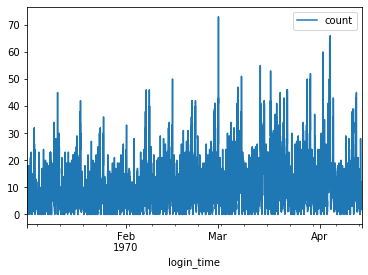

In [28]:
agg_logins.plot()

Plotting the entire series is a bit noisy, but there definitely appear to be clear seasonal peaks. Let's look at each month one by one to get a better idea.

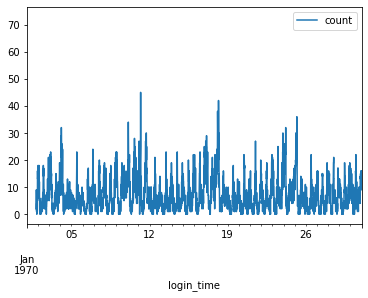

In [27]:
agg_logins.plot(xlim=('1970-01-01','1970-01-31'))

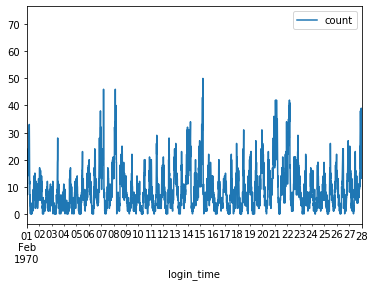

In [31]:
agg_logins.plot(xlim=('1970-02-01','1970-02-28'))

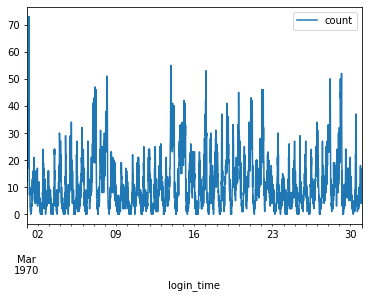

In [32]:
agg_logins.plot(xlim=('1970-03-01','1970-03-31'))

The biggest peaks appear to happen roughly weekly, but there seem to be daily cycles as well. Will examine each of those in a bit more depth.

### Weekly

For weekly patterns, will be helpful to know what day of the week a date is.

In [57]:
agg_logins.index.dayofweek()

TypeError: 'Int64Index' object is not callable

In [54]:
dayofweek = []

for date in agg_logins.index:
    dayofweek.append(date.dayofweek())

agg_logins['dayofweek'] = dayofweek

TypeError: 'int' object is not callable

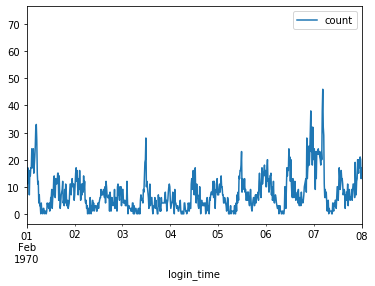

In [46]:
agg_logins.plot(xlim=('1970-02-01','1970-02-08'))

In [ ]:
### This could be a good way to visualize the cycles: 
#Third, you can set up a table in which you have the mean of all the X measurements 
# obtained in January, February, March,… Dec. [i would use weeks though]
# (This is a particularly useful way to present results if your audience is not well versed 
# in time series analysis).

### Daily

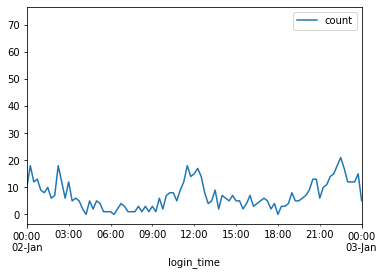

In [36]:
agg_logins.plot(xlim=('1970-01-02 00:00:00','1970-01-03 00:00:00'))

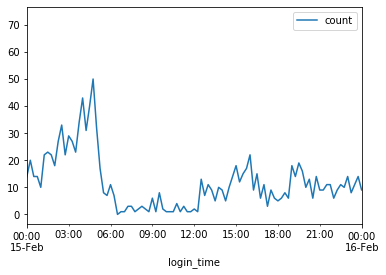

In [38]:
agg_logins.plot(xlim=('1970-02-15 00:00:00','1970-02-16 00:00:00'))

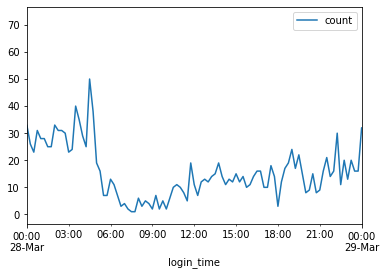

In [39]:
agg_logins.plot(xlim=('1970-03-28 00:00:00','1970-03-29 00:00:00'))

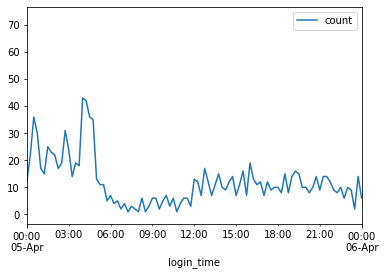

In [40]:
agg_logins.plot(xlim=('1970-04-05 00:00:00','1970-04-06 00:00:00'))

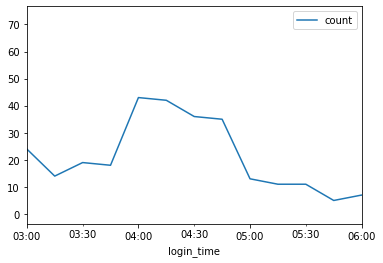

In [45]:
agg_logins.plot(xlim=('1970-04-05 03:00:00','1970-04-05 06:00:00'))